In [1]:
from os import listdir, mkdir  
from os.path import exists  
from PIL import Image  
from random import uniform  
from time import sleep  
from urllib.request import Request, urlopen  
import math  
  

In [10]:
import math
def deg2num(lat_deg, lon_deg, zoom):
  lat_rad = math.radians(lat_deg)
  n = 1 << zoom
  xtile = int((lon_deg + 180.0) / 360.0 * n)
  ytile = int((1.0 - math.asinh(math.tan(lat_rad)) / math.pi) / 2.0 * n)
  return xtile, ytile

lon = -1.571531635675696
lat = 54.926464050417465 

zoom = 15
xtile, ytile = deg2num(lat, lon, zoom)


In [11]:
xtile, ytile

(16240, 10376)

In [12]:

d  = f"curl https://api.mapbox.com/v4/mapbox.satellite/{xtile}/{ytile}/0@2x.jpg90?access_token=pk.eyJ1IjoiZ3JhY2VlYmMiLCJhIjoiY2w1dGZ6OWJoMGZ4ZDNpcGsxZWVsZnpodCJ9.oLEMkbpc0PoHsFKFh1IHMA.oLEMkbpc0PoHsFKFh1IHMA --output sat_img.jpg'"
d


"curl https://api.mapbox.com/v4/mapbox.satellite/16240/10376/0@2x.jpg90?access_token=pk.eyJ1IjoiZ3JhY2VlYmMiLCJhIjoiY2w1dGZ6OWJoMGZ4ZDNpcGsxZWVsZnpodCJ9.oLEMkbpc0PoHsFKFh1IHMA.oLEMkbpc0PoHsFKFh1IHMA --output sat_img.jpg'"

In [2]:
from src.postcode_utils import get_postcode_shapefile

In [13]:
sph

,POSTCODE,UPP,PC_AREA,geometry
31961,NE9 7LX,00004000000000917318,NE,"POLYGON ((-1.57050 54.92668, -1.57056 54.92671..."


In [27]:
from src.postcode_utils import get_postcode_shapefile, load_onsud_from_batch, find_batch_from_pc, find_postcode_for_ONSUD_file, find_data_pc, find_data_pc_spatialjoin

p='/Volumes/T9/Data_downloads/codepoint_polygons_edina/Download_all_postcodes_2378998/codepoint-poly_5267291'


INPUT_GPK = '/Volumes/T9/Data_downloads/Versik_building_data/2024_03_22_updated_data/UKBuildings_Edition_15_new_format_upn.gpkg'

pc= 'NE9 7LX'


ons = load_onsud_from_batch(find_batch_from_pc(pc))
_, d = find_postcode_for_ONSUD_file(ons, path_to_pc_shp_folder=p)
uprn_match = find_data_pc(pc, d, input_gpk=INPUT_GPK)
uprn_match.to_crs(epsg='4326', inplace=True )

sph = get_postcode_shapefile(pc)
sph.to_crs(epsg='4326', inplace=True)
lon, lat = sph.centroid.x.values[0], sph.centroid.y.values[0]   

up_spatial = find_data_pc_spatialjoin(pc, d, input_gpk=INPUT_GPK)
up_spatial.to_crs(epsg='4326', inplace=True)    

239512
Len of missing rows  0


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_32230/2690029160.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon, lat = sph.centroid.x.values[0], sph.centroid.y.values[0]
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_32230/2690029160.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lon, lat = sph.centroid.x.values[0], sph.centroid.y.values[0]
/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_32230/2690029160.py:20: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  up_spatial = find_data_pc_spatialjoin(pc, d, input_gpk=INPUT_GPK)


In [7]:
sph

,POSTCODE,UPP,PC_AREA,geometry
31961,NE9 7LX,00004000000000917318,NE,"POLYGON ((-1.57050 54.92668, -1.57056 54.92671..."


/var/folders/n5/_2d3c5sd5j3810327mknn0sh0000gn/T/ipykernel_32230/2376946049.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  up_spatial = find_data_pc_spatialjoin(pc, d, input_gpk=INPUT_GPK)


<AxesSubplot: >

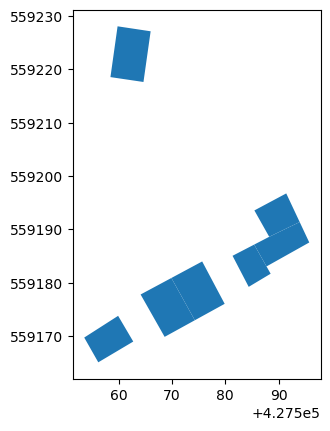

In [4]:
up_spatial.plot()

In [10]:
uprn_match


,premise_age,premise_year,premise_use,premise_type,premise_floor_count,height,premise_area,building_area,address_area,gross_area,...,uprn,uprn_count,uprn_distance,toid,map_age,map_floors,map_use,map_simple_use,upn,geometry
1,1945-1959,None,Residential,Small low terraces,2,8.1,41.400002,172.699997,82.800003,82.800003,...,1.000000e+11,1,0.0,osgb1000030271332,1945-1959,2,Residential,Residential,26390887,"MULTIPOLYGON (((-1.570 54.926, -1.570 54.926, ..."
3,1945-1959,None,Residential,Standard size semi detached,2,10.1,58.299999,117.400002,116.599998,116.599998,...,1.000000e+11,1,0.0,osgb1000030271330,1945-1959,2,Residential,Residential,26443619,"MULTIPOLYGON (((-1.570 54.926, -1.570 54.926, ..."
4,1945-1959,None,Residential,Standard size semi detached,2,8.4,30.000000,109.900002,60.000000,60.000000,...,1.002299e+10,1,0.0,osgb1000030271329,1945-1959,2,Residential,Residential,26499093,"MULTIPOLYGON (((-1.569 54.926, -1.569 54.926, ..."
6,1945-1959,None,Residential,Standard size semi detached,2,10.1,59.099998,117.400002,118.199997,118.199997,...,1.000000e+11,1,0.0,osgb1000030271331,1945-1959,2,Residential,Residential,26568501,"MULTIPOLYGON (((-1.570 54.926, -1.570 54.926, ..."
7,1945-1959,None,Residential,Standard size semi detached,2,8.4,37.900002,109.900002,75.800003,75.800003,...,1.000000e+11,1,0.0,osgb1000030271328,1945-1959,2,Residential,Residential,26586475,"MULTIPOLYGON (((-1.569 54.927, -1.569 54.927, ..."
9,1945-1959,None,Residential,3-4 storey and smaller flats,3,9.9,58.200001,234.399994,87.300003,174.600006,...,1.000000e+11,2,0.0,osgb1000030271343,1945-1959,3,Residential,Residential,26672273,"MULTIPOLYGON (((-1.570 54.927, -1.570 54.927, ..."


In [28]:

uprn_match = uprn_match.to_crs(ccrs.PlateCarree().proj4_init)
up_spatial = up_spatial.to_crs(ccrs.PlateCarree().proj4_init)   

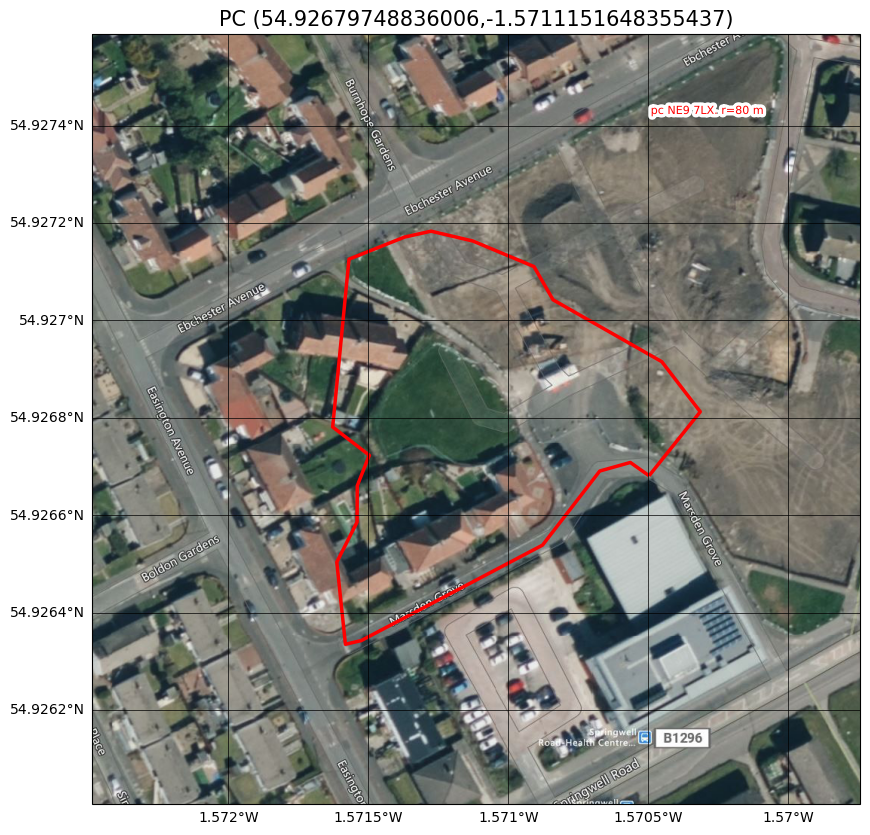

In [35]:

__title__   = 'Plot OpenStreetMap site map'
__version__ = 'v1.0 (2021-03-02)'
# __author__  = 'Mathew Lipson'
# __email__   = 'm.lipson@unsw.edu.au'

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import cartopy
import cartopy.geodesic as cgeo
import cartopy.crs as ccrs

import cartopy.io.img_tiles as cimgt
import io
from urllib.request import urlopen, Request
from PIL import Image
import shapely

projpath = '.'

##########################################################################

def main():

    sitename = 'PC'
    # lat = 6.9205
    # lon = 79.8571
  

    # style can be 'map' or 'satellite'

    for style in ['map','satellite']:

        osm_image(lon, lat, sitename=sitename,
            style=style, radius=80, npoints=500)

    return

##########################################################################

def osm_image(lon,lat,sitename='Columbo',style='satellite',radius=100,npoints=500, centroid=False ):
    '''This function makes OpenStreetMap satellite or map image with circle and random points.
    Change np.random.seed() number to produce different (reproducable) random patterns of points.
    Also review 'scale' variable'''

    if style=='map':
        ## MAP STYLE
        cimgt.OSM.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.OSM() # spoofed, downloaded street map
    elif style =='satellite':
        # SATELLITE STYLE
        cimgt.QuadtreeTiles.get_image = image_spoof # reformat web request for street map spoofing
        img = cimgt.QuadtreeTiles() # spoofed, downloaded street map
    else:
        print('no valid style')

    stroke = [pe.Stroke(linewidth=1, foreground='w'), pe.Normal()]

    ############################################################################

    plt.close('all')
    fig = plt.figure(figsize=(15,10)) # open matplotlib figure
    ax = plt.axes(projection=img.crs) # project using coordinate reference system (CRS) of street map
    data_crs = ccrs.PlateCarree()

    ax.set_title(f'{sitename} ({lat},{lon})',fontsize=15)

    # auto-calculate scale
    scale = int(120/np.log(radius))
    scale = (scale<20) and scale or 19
    
    # or change scale manually
    # NOTE: scale specifications should be selected based on radius
    # but be careful not have both large scale (>16) and large radius (>1000), 
    #  it is forbidden under [OSM policies](https://operations.osmfoundation.org/policies/tiles/)
    # -- 2     = coarse image, select for worldwide or continental scales
    # -- 4-6   = medium coarseness, select for countries and larger states
    # -- 6-10  = medium fineness, select for smaller states, regions, and cities
    # -- 10-12 = fine image, select for city boundaries and zip codes
    # -- 14+   = extremely fine image, select for roads, blocks, buildings

    extent = calc_extent(lon,lat,radius*1.1)
    ax.set_extent(extent) # set extents
    ax.add_image(img, int(scale)) # add OSM with zoom specification

    # add site
    if centroid == True:
        ax.plot(lon,lat, color='black', marker='x', ms=7, mew=3, transform=data_crs)
        ax.plot(lon,lat, color='red', marker='x', ms=6, mew=2, transform=data_crs)

    # if npoints>0: 
    #     # set random azimuth angles (seed for reproducablity)
    #     np.random.seed(1235)
    #     rand_azimuths_deg = np.random.random(npoints)*360

    #     # set random distances (seed for reproducablity)
    #     np.random.seed(6341)
    #     rand_distances = radius*np.sqrt((np.random.random(npoints))) # np.random.uniform(low=0, high=radius, size=npoints)

    #     rand_lon = cgeo.Geodesic().direct((lon,lat),rand_azimuths_deg,rand_distances)[:,0]
    #     rand_lat = cgeo.Geodesic().direct((lon,lat),rand_azimuths_deg,rand_distances)[:,1]

    #     ax.plot(rand_lon,rand_lat,color='black',lw=0,marker='x',ms=4.5,mew=1.0,transform=data_crs)
    #     ax.plot(rand_lon,rand_lat,color='yellow',lw=0,marker='x',ms=4,mew=0.5,transform=data_crs)

    # # add cartopy geodesic circle
    # circle_points = cgeo.Geodesic().circle(lon=lon, lat=lat, radius=radius)
    # geom = shapely.geometry.Polygon(circle_points)
    # ax.add_geometries((geom,), crs=ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=2.5)

    sph.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2.5, transform=ccrs.PlateCarree())
    
    # up_spatial.plot(ax=ax, facecolor='yellow', alpha=0.5, transform=ccrs.PlateCarree()) 
    # uprn_match.plot(ax=ax, facecolor='blue' , alpha=0.5, transform=ccrs.PlateCarree()) 
    
    radius_text = cgeo.Geodesic().direct(points=(lon,lat),azimuths=30,distances=radius)[:,0:2][0]
    
    stroke = [pe.Stroke(linewidth=5, foreground='w'), pe.Normal()]
    ax.text(radius_text[0],radius_text[1],f'pc {pc}. r={radius} m', color='red', 
        fontsize=8, ha='left',va='bottom', path_effects=stroke, transform=data_crs)

    gl = ax.gridlines(draw_labels=True, crs=data_crs,
                        color='k',lw=0.5)

    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
    gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

    # plt.show()

    fig.savefig(f'{projpath}/{sitename}_{style}_r{radius}_pts{npoints}_scale{scale}.jpg', dpi=150, bbox_inches='tight')

    return

def calc_extent(lon,lat,dist):
    '''This function calculates extent of map
    Inputs:
        lat,lon: location in degrees
        dist: dist to edge from centre
    '''

    dist_cnr = np.sqrt(2*dist**2)
    top_left = cgeo.Geodesic().direct(points=(lon,lat),azimuths=-45,distances=dist_cnr)[:,0:2][0]
    bot_right = cgeo.Geodesic().direct(points=(lon,lat),azimuths=135,distances=dist_cnr)[:,0:2][0]

    extent = [top_left[0], bot_right[0], bot_right[1], top_left[1]]

    return extent

def image_spoof(self, tile):
    '''this function reformats web requests from OSM for cartopy
    Heavily based on code by Joshua Hrisko at:
        https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy'''

    url = self._image_url(tile)                # get the url of the street map API
    req = Request(url)                         # start request
    req.add_header('User-agent','Anaconda 3')  # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read())            # get image
    fh.close()                                 # close url
    img = Image.open(im_data)                  # open image with PIL
    img = img.convert(self.desired_tile_form)  # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

if __name__ == "__main__":

   main()